# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{base_url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"] 
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]
          # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | basco
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | mirny
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | paracatu
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | cobija
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | puerto deseado
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | redwood falls
Processing Record 19 of Set 1 | gebeit
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of Set 1 | garoowe
Processing Record 23 of Set 1 | k

Processing Record 40 of Set 4 | sungailiat
Processing Record 41 of Set 4 | sarai
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | dakhla
Processing Record 44 of Set 4 | ocean shores
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | nizhnyaya poyma
Processing Record 47 of Set 4 | kralendijk
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | visby
Processing Record 0 of Set 5 | kuanda
Processing Record 1 of Set 5 | singkawang
Processing Record 2 of Set 5 | yanchep
Processing Record 3 of Set 5 | jamundi
Processing Record 4 of Set 5 | port mathurin
Processing Record 5 of Set 5 | vorkuta
Processing Record 6 of Set 5 | la punta
Processing Record 7 of Set 5 | menongue
Processing Record 8 of Set 5 | san rafael
Processing Record 9 of Set 5 | new plymouth
Processing Record 10 of Set 5 | luderitz
Processing Record 11 of Set 5 | colac
Processing Record 12 of Set 5 | djambala
Processing Record 13 of Set 5 | gadzhiyevo
Processing R

Processing Record 30 of Set 8 | rolla
Processing Record 31 of Set 8 | porto novo
Processing Record 32 of Set 8 | shahrak
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | kristiansund
Processing Record 35 of Set 8 | saudarkrokur
Processing Record 36 of Set 8 | ribeira brava
Processing Record 37 of Set 8 | at-bashi
Processing Record 38 of Set 8 | astoria
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | bulle
Processing Record 41 of Set 8 | enshi
Processing Record 42 of Set 8 | villa santa rita
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | ndele
Processing Record 45 of Set 8 | chonchi
Processing Record 46 of Set 8 | olinda
Processing Record 47 of Set 8 | hirara
Processing Record 48 of Set 8 | okha
Processing Record 49 of Set 8 | gunjur
Processing Record 0 of Set 9 | las tablas
Processing Record 1 of Set 9 | paraiso
Processing Record 2 of Set 9 | shetpe
Processing Record 3 of Set 9 | fuvahmulah
City not found. Skipping..

Processing Record 25 of Set 12 | cannonvale
Processing Record 26 of Set 12 | santa cruz do capibaribe
Processing Record 27 of Set 12 | milagros
Processing Record 28 of Set 12 | corner brook
Processing Record 29 of Set 12 | gorom-gorom
Processing Record 30 of Set 12 | salekhard
Processing Record 31 of Set 12 | klaksvik
Processing Record 32 of Set 12 | vom
Processing Record 33 of Set 12 | nyandoma
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.21,81,18,8.08,GS,1682356765
1,waitangi,-43.9535,-176.5597,11.89,51,92,14.07,NZ,1682356766
2,basco,20.4487,121.9702,24.83,79,45,7.09,PH,1682356294
3,vorgashor,67.5833,63.9500,-7.96,96,94,4.80,RU,1682356664
4,margaret river,-33.9500,115.0667,12.75,77,96,7.54,AU,1682356766


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.21,81,18,8.08,GS,1682356765
1,waitangi,-43.9535,-176.5597,11.89,51,92,14.07,NZ,1682356766
2,basco,20.4487,121.9702,24.83,79,45,7.09,PH,1682356294
3,vorgashor,67.5833,63.9500,-7.96,96,94,4.80,RU,1682356664
4,margaret river,-33.9500,115.0667,12.75,77,96,7.54,AU,1682356766


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

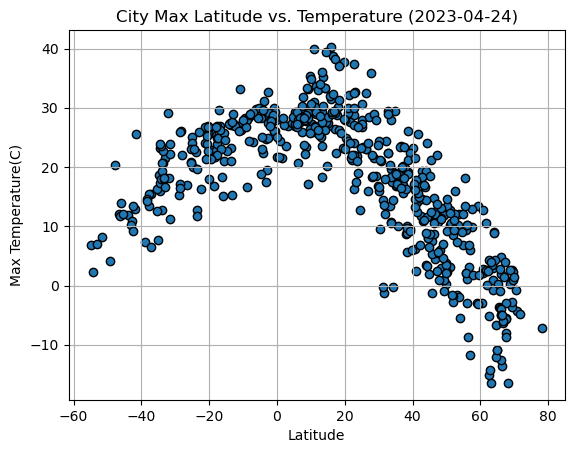

In [23]:
# Build scatter plot for latitude vs. temperatureplt.scatter()
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolor="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

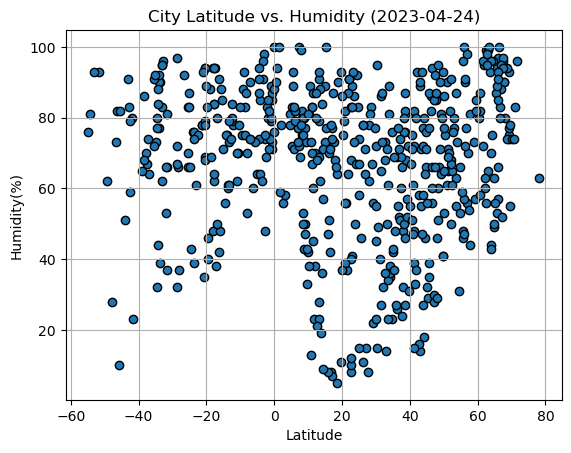

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x_values, city_data_df["Humidity"],edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

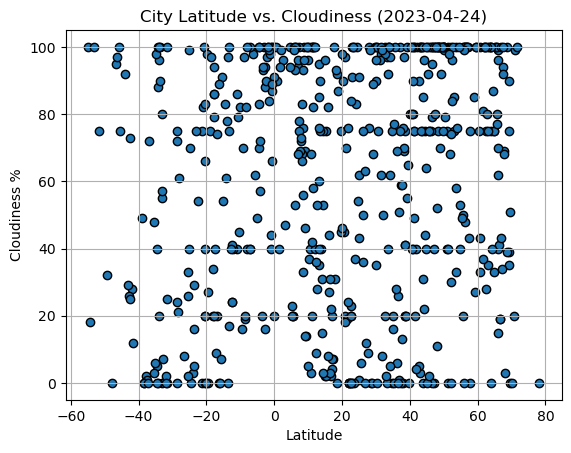

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x_values, city_data_df["Cloudiness"].astype("float"),edgecolor="black")

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

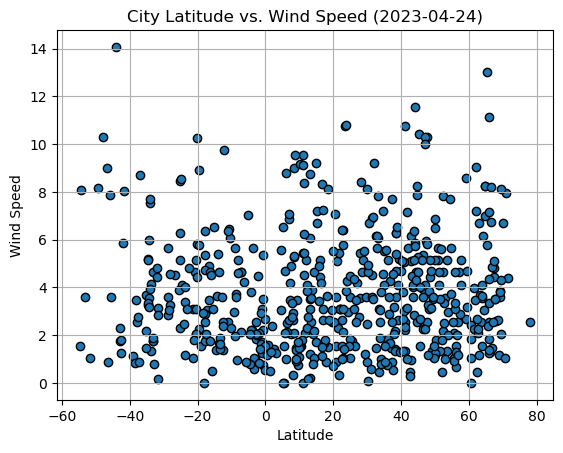

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x_values, city_data_df["Wind Speed"],edgecolor="black")

# Incorporate the other graph properties
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    print(f"R value: {rvalue}")
    return line_eq
def annotate(line_eq,x,y):
    plt.annotate(line_eq,(x,y),fontsize=15, color="red")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,basco,20.4487,121.9702,24.83,79,45,7.09,PH,1682356294
3,vorgashor,67.5833,63.9500,-7.96,96,94,4.80,RU,1682356664
7,mirny,62.5353,113.9611,-15.09,99,28,0.45,RU,1682356767
10,ilulissat,69.2167,-51.1000,1.01,93,75,3.60,GL,1682356768
12,iqaluit,63.7506,-68.5145,0.85,93,100,2.57,CA,1682356769


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.21,81,18,8.08,GS,1682356765
1,waitangi,-43.9535,-176.5597,11.89,51,92,14.07,NZ,1682356766
4,margaret river,-33.9500,115.0667,12.75,77,96,7.54,AU,1682356766
5,east london,-33.0153,27.9116,21.52,83,0,4.63,ZA,1682356737
6,port-aux-francais,-49.3500,70.2167,4.12,62,32,8.15,TF,1682356767


###  Temperature vs. Latitude Linear Regression Plot

R value: -0.8664125405681913


Text(0, 0.5, 'Max Temp (C)')

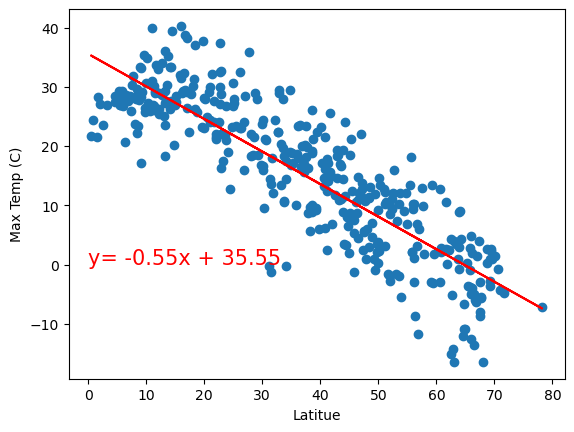

In [24]:
# Linear regression on Northern Hemisphere
NH = lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
annotate(NH,0,0)
plt.xlabel("Latitue")
plt.ylabel("Max Temp (C)")

R value: 0.7678922019137394


Text(0, 0.5, 'Max Temp (C)')

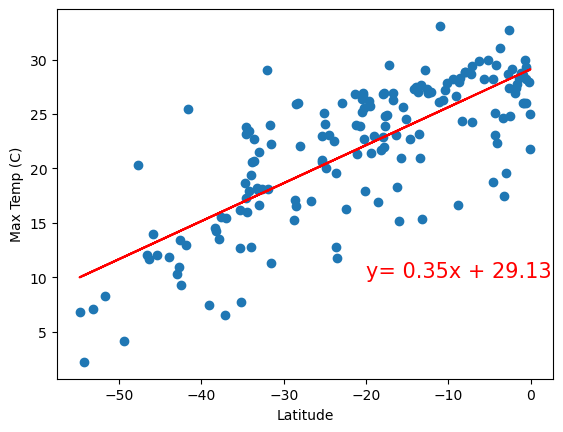

In [25]:
# Linear regression on Southern Hemisphere
SH = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
annotate(SH,-20,10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

**Discussion about the linear relationship: The rvalue for the Northern Hemisphere is negative and close to 1, this means there is a slight negative cfoorelation between temature and latitue in the northern hemsphere. This means the further away the latitude is from the equater the lower the tempas for Southern Hemisphere the r value is close to 1 and positive, this means there is a slight positive relationship between temp and latitue. Meaning the closer the latitude is to the equator (0) the higher the temp.

### Humidity vs. Latitude Linear Regression Plot

R value: 0.14985965582517477


Text(0, 0.5, 'Humidity %')

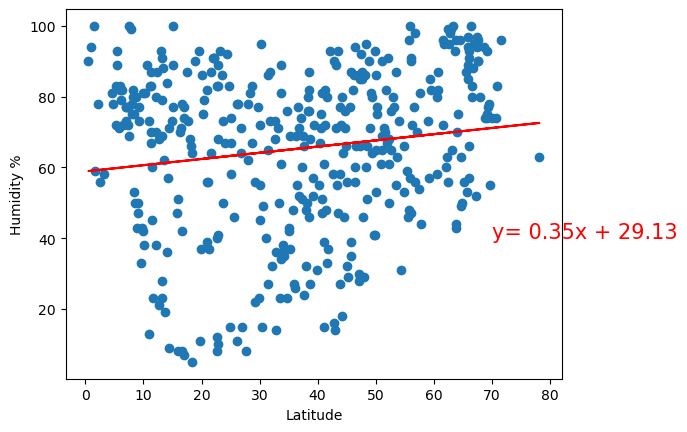

In [17]:
# Northern Hemisphere
NH =lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
annotate(SH,70,40)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

R value: 0.1668001769137931


Text(0, 0.5, 'Humidity %')

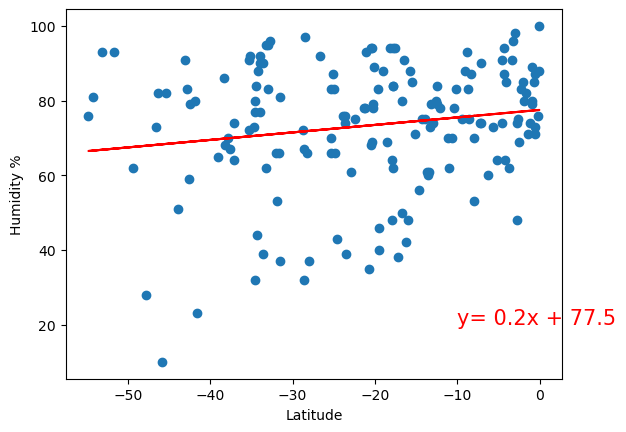

In [18]:
# Southern Hemisphe
SH = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
annotate(SH,-10,20)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

**Discussion about the linear relationship:** for both the Northern and Southern hemisphere, the r value is low and not very close to one. Meaning there is no real/ very weak correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

R value: 0.09777180352453553


Text(0, 0.5, 'Cloudiness')

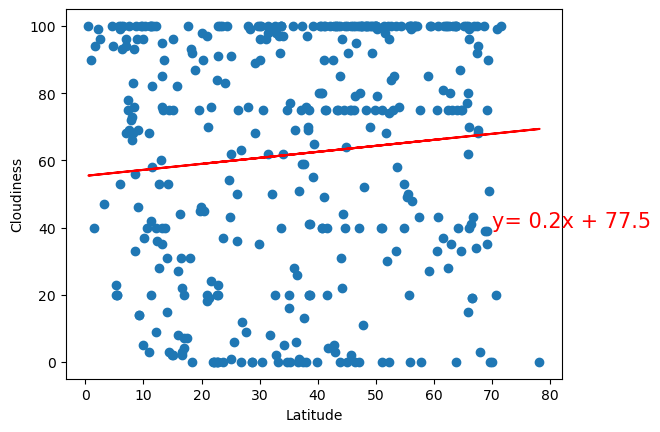

In [19]:
# Northern Hemisphere
NH =lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
annotate(SH,70,40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

R value: 0.25764903342900014


Text(0, 0.5, 'Cloudiness')

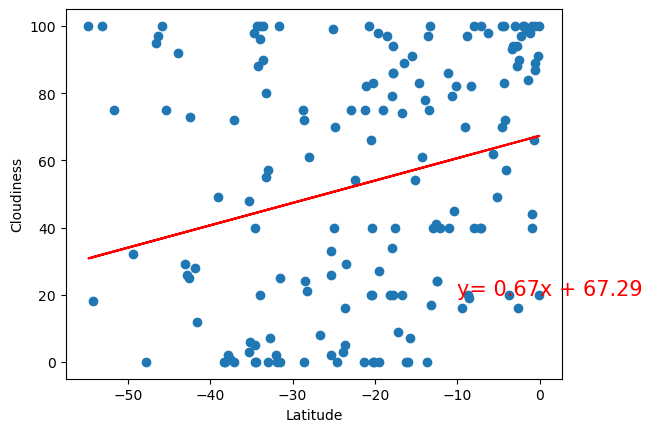

In [20]:
# Southern Hemisphere
SH = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
annotate(SH,-10,20)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** the r value is not close to one in either the northern or southern hemisphere. meaning there is no real correlation between latitude and humidity

### Wind Speed vs. Latitude Linear Regression Plot

R value: 0.07896572636147667


Text(0, 0.5, 'Wind Speed')

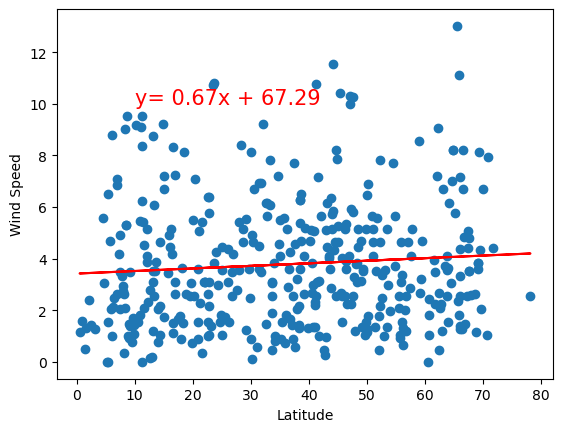

In [21]:
# Northern Hemisphere
NH =lin_reg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
annotate(SH,10,10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

R value: -0.2545329996940451


Text(0, 0.5, 'Wind Speed')

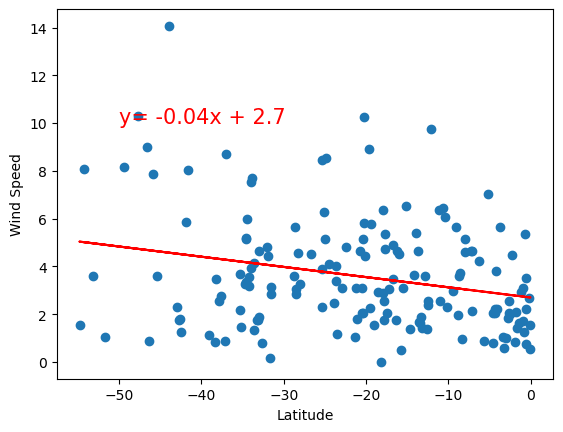

In [22]:
# Southern Hemisphere
SH = lin_reg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
annotate(SH,-50,10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:**  There is a very weak correlation between windspeed and latitude in both the Northern and Southern hemispheres 